In [53]:
library(tidyverse) # metapackage with lots of helpful functions
library(gridExtra) # to plot multiple ggplots aside
library(car)
library(dplyr)
library(readr)
library(tidyr)
library(stringr)
library(ggplot2)
library(caTools)
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


In [52]:
#install.packages('car')
install.packages('dplyr')
#install.packages('ggplot')
install.packages('caTools')
install.packages('corrplot')

also installing the dependencies 'glue', 'rlang', 'tibble', 'tidyselect'

Warning message:
"packages 'tibble', 'dplyr' are in use and will not be installed"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\tashi\Anaconda3\envs\R and P\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"


The downloaded binary packages are in
	C:\Users\tashi\AppData\Local\Temp\Rtmp0E8OWP\downloaded_packages


Warning message:
"package 'caTools' is in use and will not be installed"

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tashi\AppData\Local\Temp\Rtmp0E8OWP\downloaded_packages


In [9]:
#read the csv insurance datafile
df <-read.csv("insurance.csv")
str(df)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [10]:
head(df,7)

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590


In [93]:
#convert the file into datafram

df1 <-data.frame(df, stringsAsFactor=FALSE)
summary(df1)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges      stringsAsFactor
 northeast:324   Min.   : 1122   Mode :logical  
 northwest:325   1st Qu.: 4740   FALSE:1338     
 southeast:364   Median : 9382                  
 southwest:325   Mean   :13270                  
                 3rd Qu.:16640                  
                 Max.   :63770                  

In [94]:
# let do some descriptive analysis of the data
# let see how many somokers are male and how many are female
#df1 %>%
table1 <-table(df1$sex, df1$smoker)
table1


        
          no yes
  female 547 115
  male   517 159

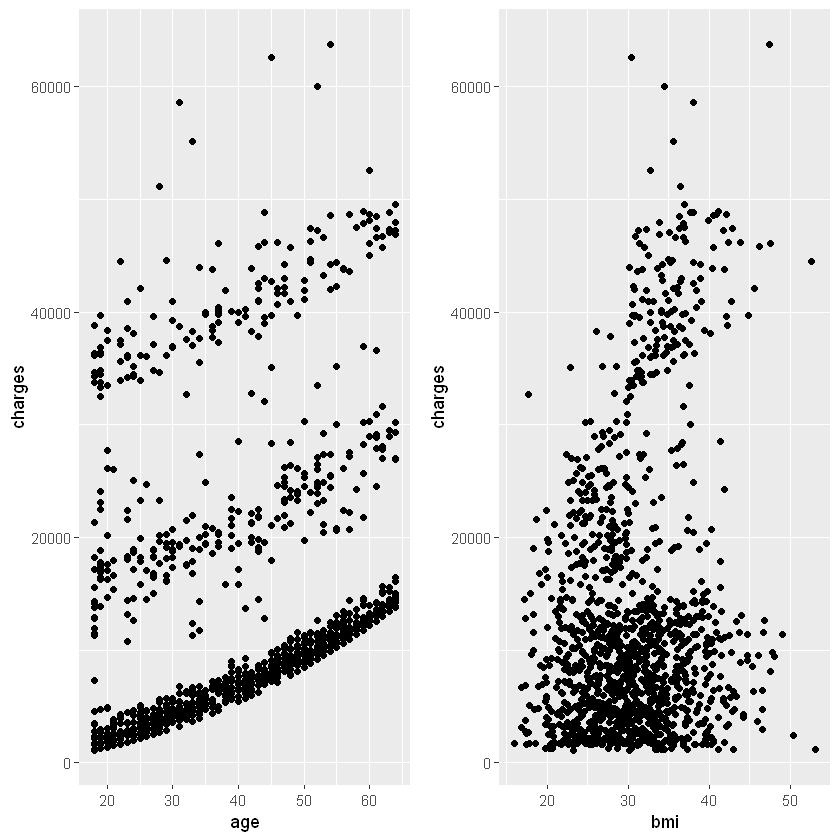

In [95]:
# The above table shows no. of female and male who are identified as smoker and non-smoker.
# let plot some visual graph to draw insights

plot.age <- ggplot(df1, aes(age, charges))+
geom_point()

plot.bmi <- ggplot(df1, aes(bmi, charges))+
geom_point()

grid.arrange(plot.age, plot.bmi, ncol=2)


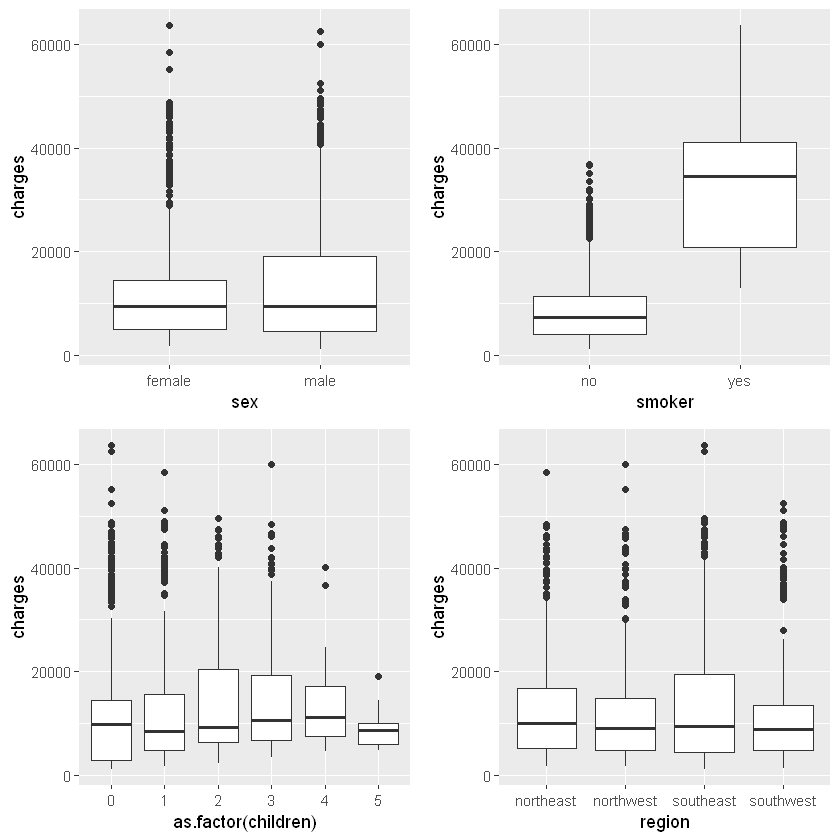

In [96]:
# as we can see on the above two plots; plot.age and plot.bmi. It is clear that there are some correlations between age and charges. 
# Let find the trend for the two groups, those who identify themselves as smoker and non-smoker

plot.sex <- ggplot(df1, aes(x = sex, y = charges)) +
 geom_boxplot()

plot.smoker <- ggplot(df1, aes(x = smoker, y = charges)) +
 geom_boxplot()

plot.child <- ggplot(df1, aes(x = as.factor(children), y = charges)) +
 geom_boxplot()

plot.region <- ggplot(df1, aes(x = region, y = charges)) +
 geom_boxplot()

grid.arrange(plot.sex, plot.smoker, plot.child, plot.region, ncol=2, nrow=2)


,age,bmi,charges
age,1.0000000,0.1092719,0.2990082
bmi,0.1092719,1.0000000,0.1983410
charges,0.2990082,0.1983410,1.0000000


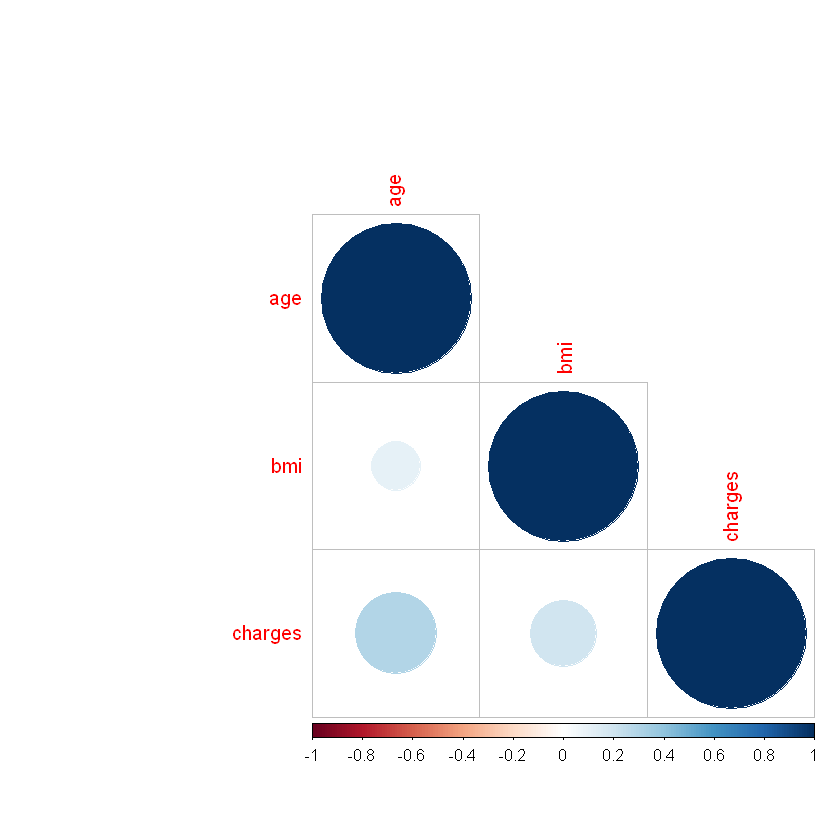

In [97]:
#sex vs charges plot shows male and female both pay on average same charges. However, smokers pay significantly 
#higher on average than the non-somkers. 
# let's find out the correlationship between the variable

df2 <- df1 %>%
select (age, bmi, charges)
correlation_1 <-cor(df2)
correlation_1
corrplot(correlation_1, type="lower")




In [98]:
# set training data and test data
set.seed(2)
split <- sample.split(df2$charges, SplitRatio=0.7)
#split
training_data <- subset(df1, split=="TRUE")
testing_data <- subset(df1, split=="FALSE")
#create linear regression model 
model <-lm(charges~age +bmi, data=training_data, na.action= na.omit)
summary(model)


Call:
lm(formula = charges ~ age + bmi, data = training_data, na.action = na.omit)

Residuals:
   Min     1Q Median     3Q    Max 
-14084  -6921  -5125   7757  44920 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5561.26    2074.67  -2.681  0.00748 ** 
age           237.21      26.56   8.932  < 2e-16 ***
bmi           311.30      61.32   5.076 4.64e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11220 on 933 degrees of freedom
Multiple R-squared:  0.1098,	Adjusted R-squared:  0.1079 
F-statistic: 57.56 on 2 and 933 DF,  p-value: < 2.2e-16


In [99]:
#prediction
model.training <- predict(model, training_data)
model.testing <-predict(model, testing_data)

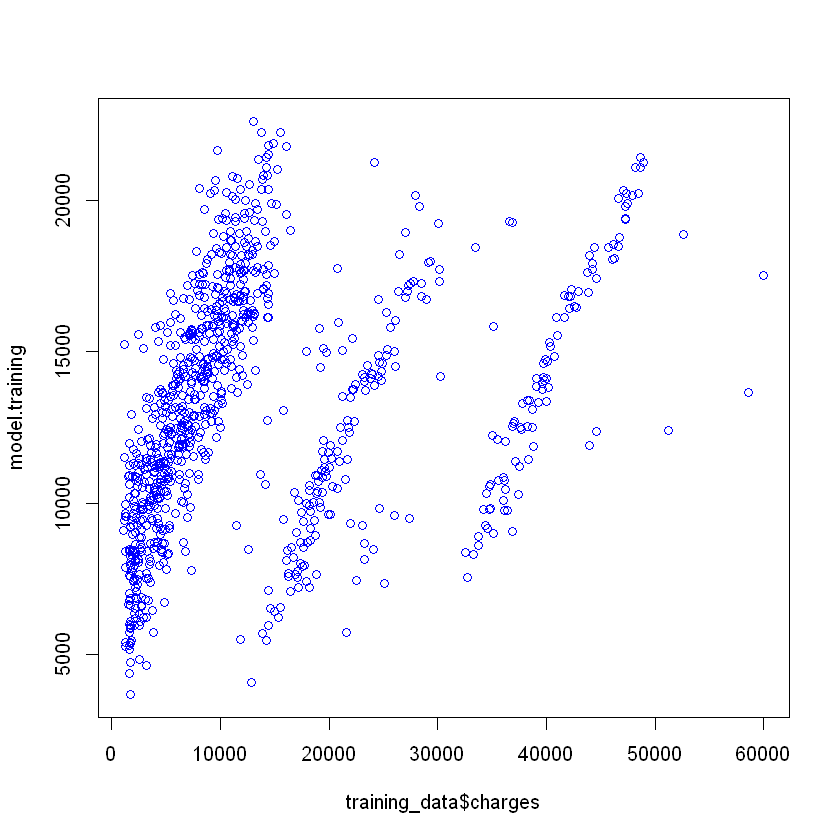

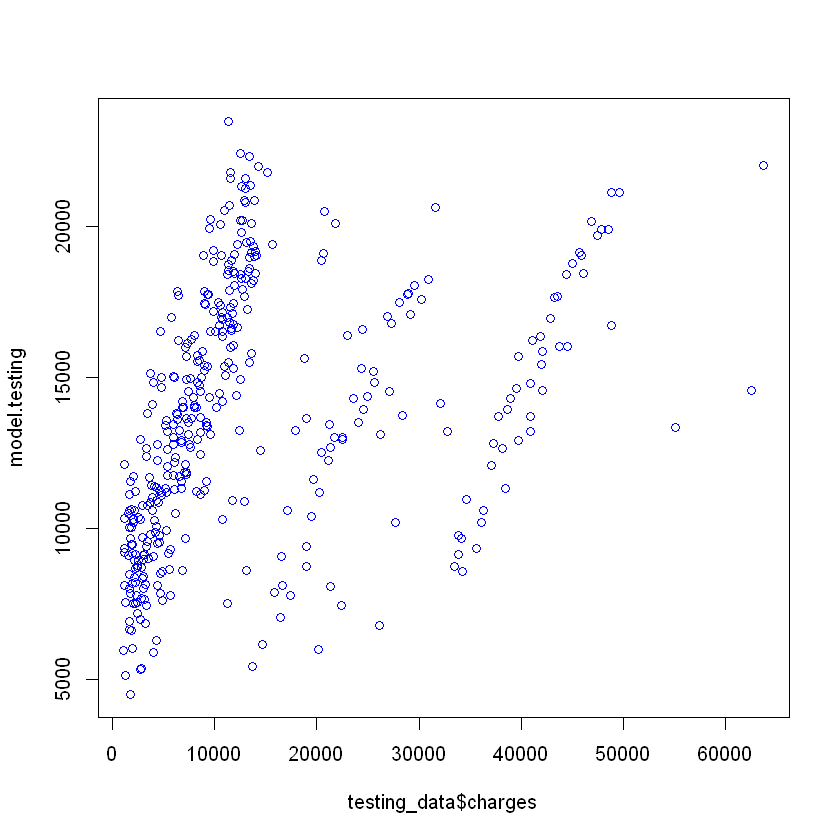

In [100]:
plot_training <-plot(training_data$charges, model.training, col="blue")
plot_testing <- plot(testing_data$charges, model.testing, col="blue")


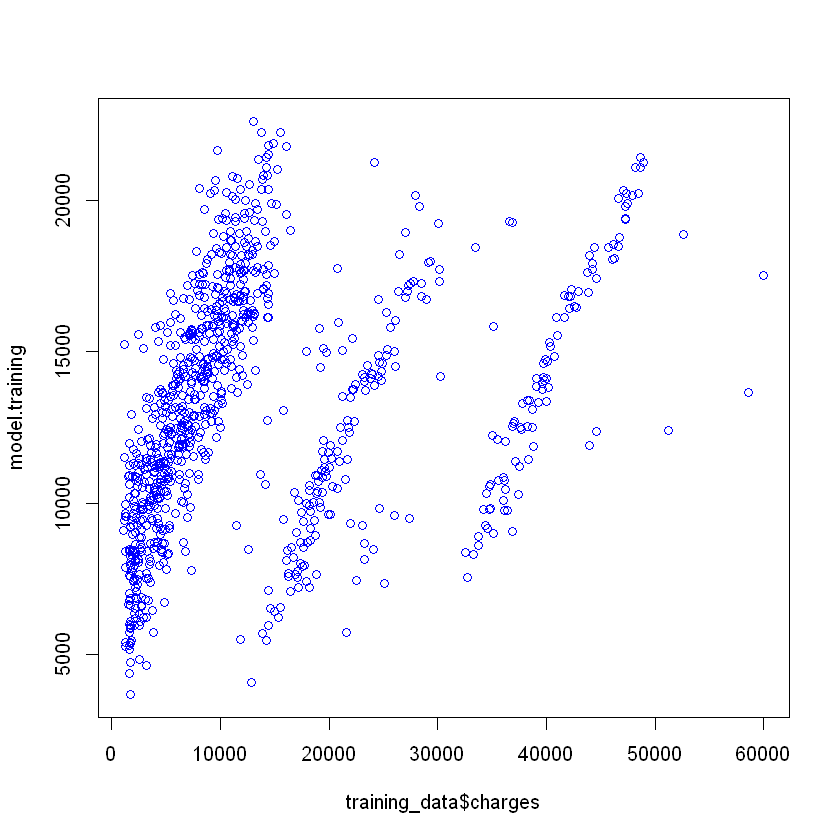

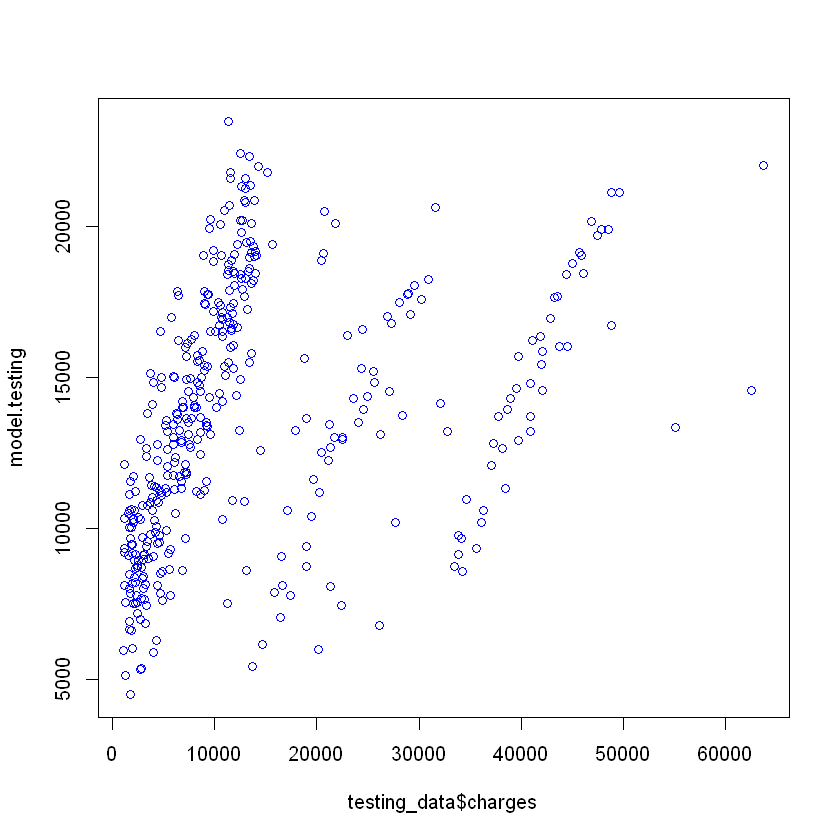

In [101]:
model_2 <- lm(charges ~ smoker + age + bmi + children + region, data = df1)
model.training.1 <- predict(model_2, training_data)
model.testing.1 <-predict(model_2, testing_data)
plot_training.1 <-plot(training_data$charges, model.training, col="blue")
plot_testing.2 <- plot(testing_data$charges, model.testing, col="blue")
#summary(model_2)

In [102]:
summary(model_2)


Call:
lm(formula = charges ~ smoker + age + bmi + children + region, 
    data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-11367.2  -2835.4   -979.7   1361.9  29935.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11990.27     978.76 -12.250  < 2e-16 ***
smokeryes        23836.30     411.86  57.875  < 2e-16 ***
age                256.97      11.89  21.610  < 2e-16 ***
bmi                338.66      28.56  11.858  < 2e-16 ***
children           474.57     137.74   3.445 0.000588 ***
regionnorthwest   -352.18     476.12  -0.740 0.459618    
regionsoutheast  -1034.36     478.54  -2.162 0.030834 *  
regionsouthwest   -959.37     477.78  -2.008 0.044846 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6060 on 1330 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7496 
F-statistic: 572.7 on 7 and 1330 DF,  p-value: < 2.2e-16


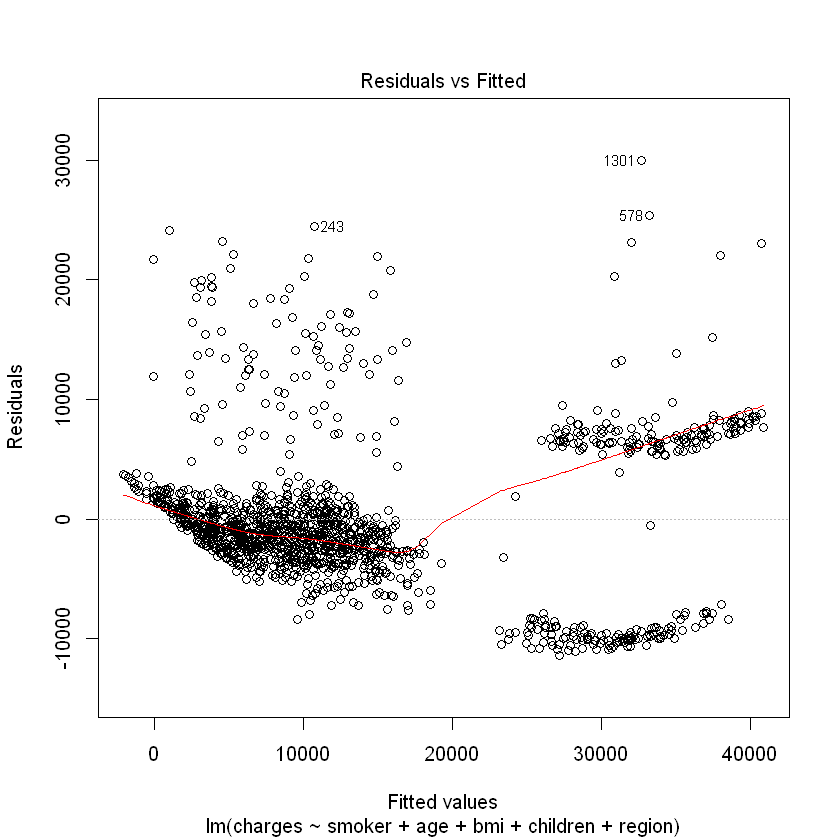

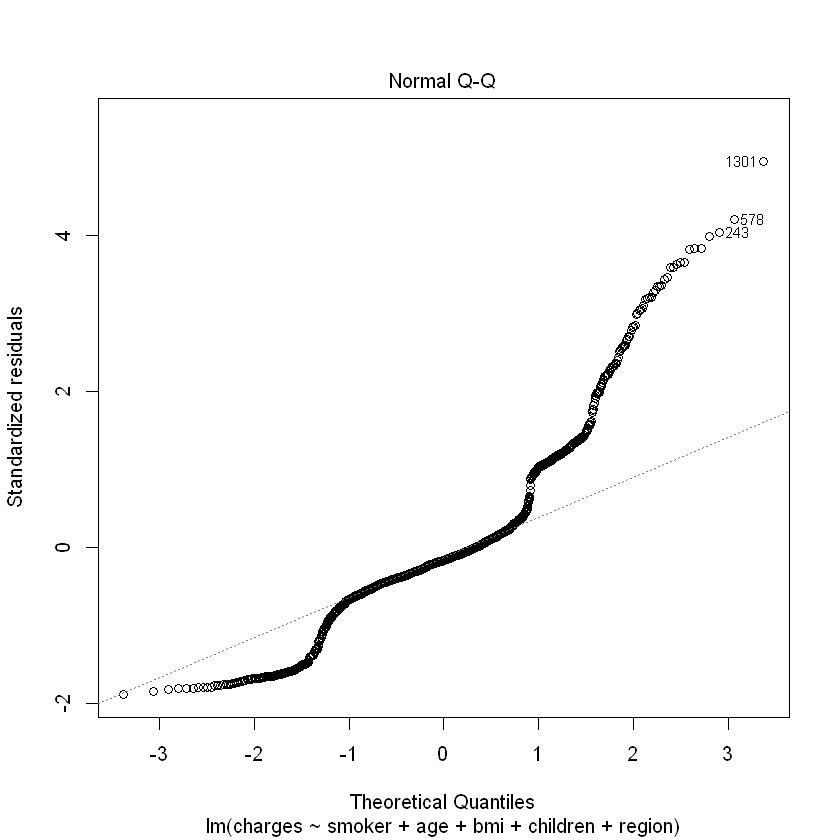

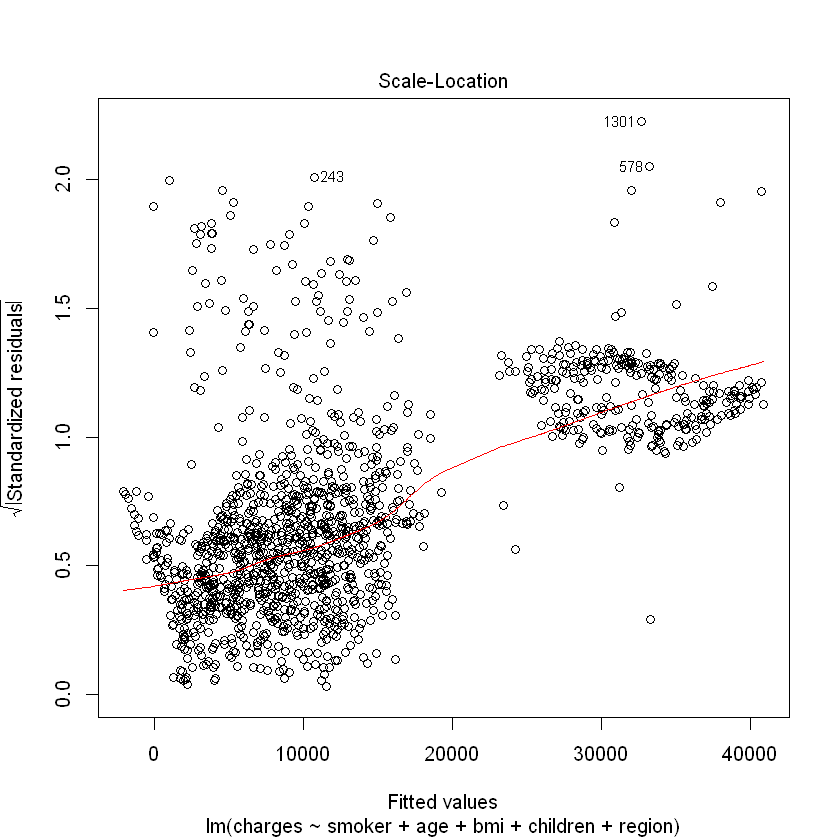

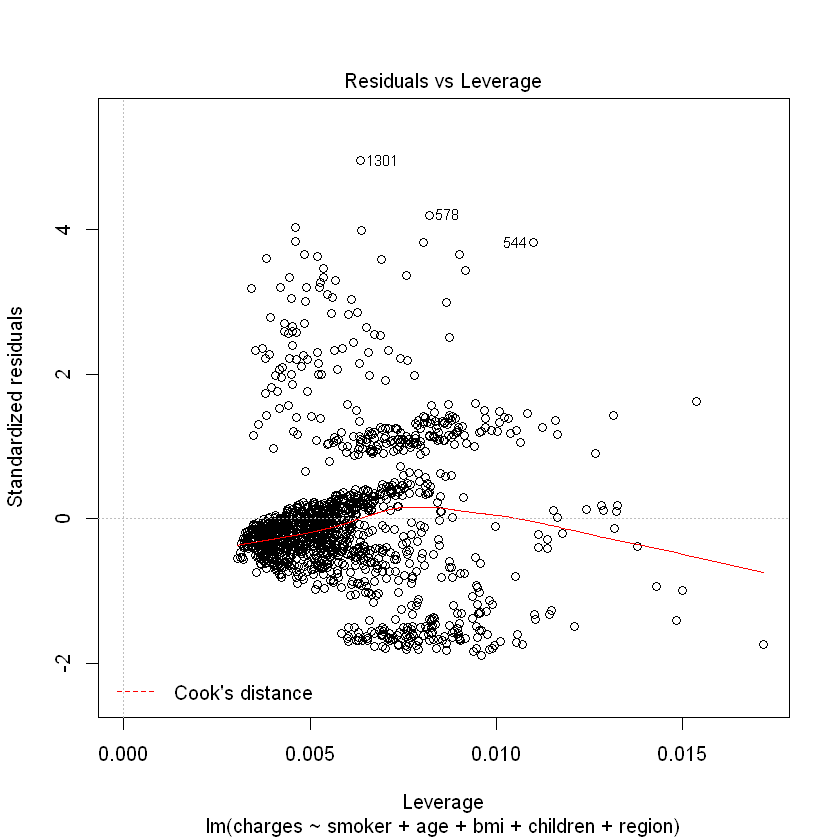

In [76]:
plot(model_2)

In [103]:
# As we can see Normal Q-Q graph, it appears, it behaves as non-linear. 
df3 <-df1 %>%
mutate(age_sqt = age^2)
head(df3,5)


age,sex,bmi,children,smoker,region,charges,stringsAsFactor,age_sqt
19,female,27.900,0,yes,southwest,16884.924,FALSE,361
18,male,33.770,1,no,southeast,1725.552,FALSE,324
28,male,33.000,3,no,southeast,4449.462,FALSE,784
33,male,22.705,0,no,northwest,21984.471,FALSE,1089
32,male,28.880,0,no,northwest,3866.855,FALSE,1024


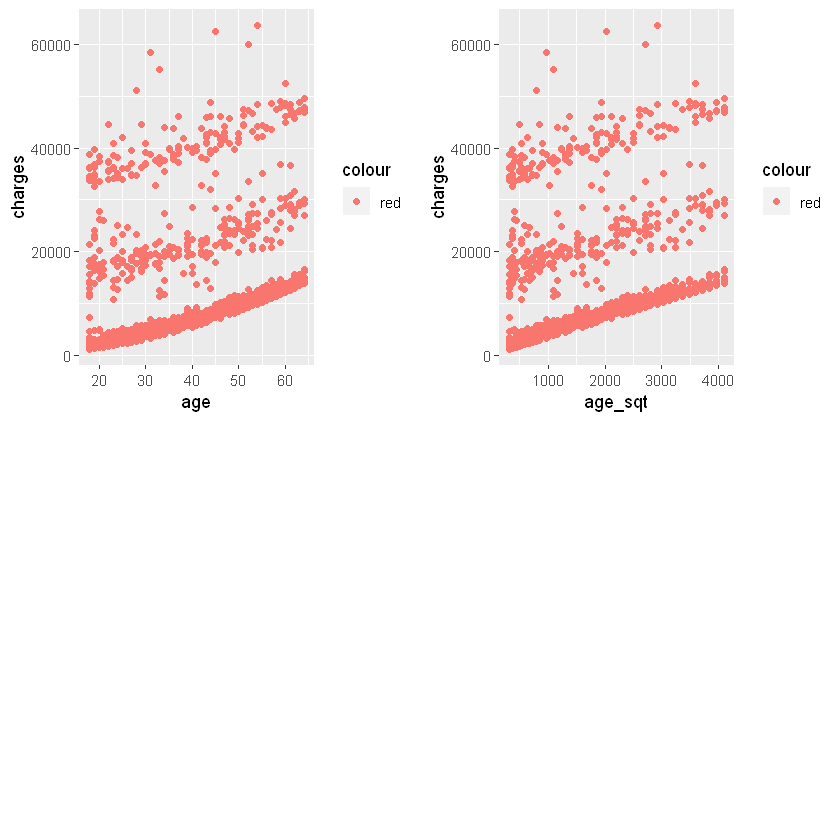

In [104]:
plot.age1 <- ggplot(df3, aes(age, charges, color='red'))+
geom_point()
plot.age.sqt <- ggplot(df3, aes(age_sqt, charges, color="red"))+
geom_point()
grid.arrange(plot.age1, plot.age.sqt, ncol=2, nrow=2)

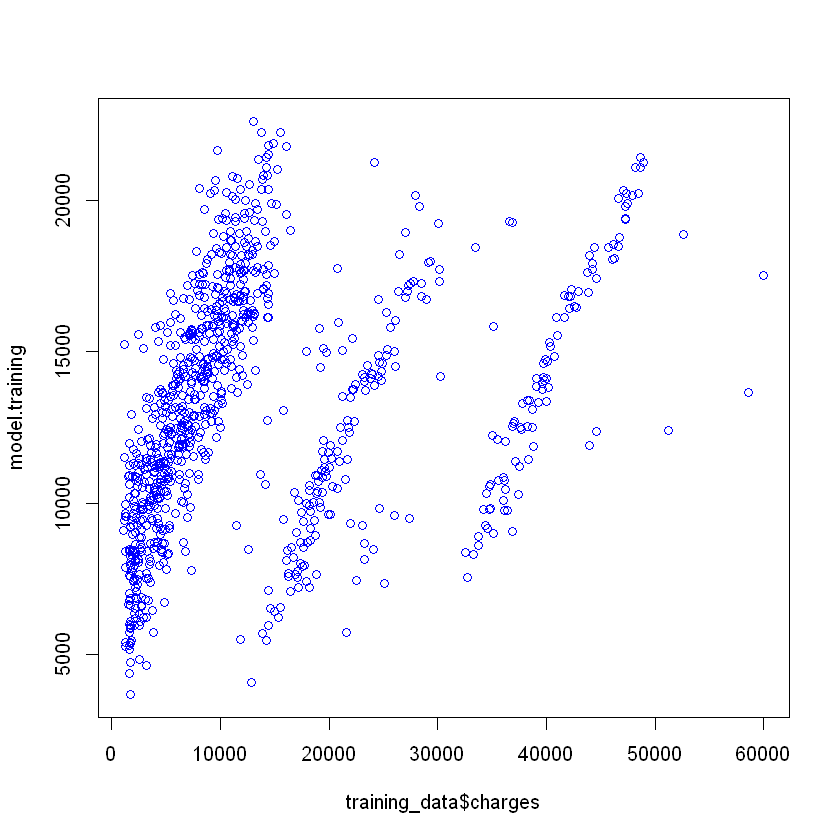

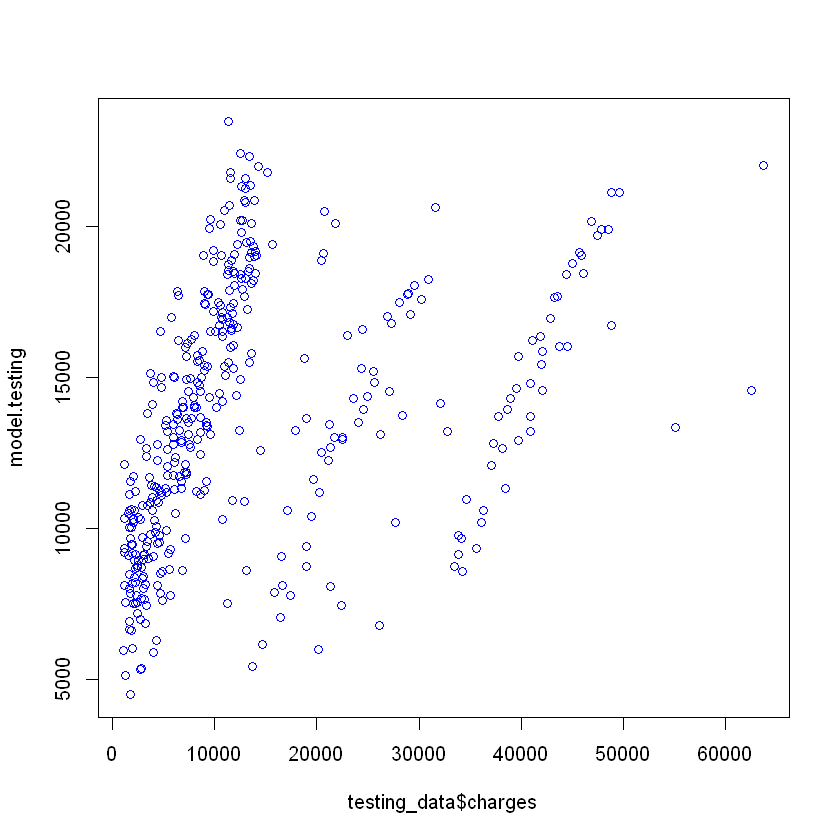

In [105]:
set.seed(2)
split <- sample.split(df3$charges, SplitRatio=0.7)
#split
training_data <- subset(df3, split=="TRUE")
testing_data <- subset(df3, split=="FALSE")

model_3 <- lm(charges ~ smoker + age_sqt + bmi + children + region, data = df3)
model.training.1 <- predict(model_3, training_data)
model.testing.1 <-predict(model_3, testing_data)
plot_training.1 <-plot(training_data$charges, model.training, col="blue")
plot_testing.2 <- plot(testing_data$charges, model.testing, col="blue")
#summary(model_2)

In [106]:
summary(model_3)


Call:
lm(formula = charges ~ smoker + age_sqt + bmi + children + region, 
    data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-11487.1  -2861.2   -964.7   1343.2  30614.3 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -7600.5665   916.6321  -8.292 2.70e-16 ***
smokeryes       23845.9742   409.6125  58.216  < 2e-16 ***
age_sqt             3.2552     0.1475  22.064  < 2e-16 ***
bmi               335.0178    28.4165  11.790  < 2e-16 ***
children          612.0070   136.8764   4.471 8.44e-06 ***
regionnorthwest  -364.2813   473.5166  -0.769   0.4418    
regionsoutheast -1029.7245   475.9201  -2.164   0.0307 *  
regionsouthwest  -956.9481   475.1675  -2.014   0.0442 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6027 on 1330 degrees of freedom
Multiple R-squared:  0.7536,	Adjusted R-squared:  0.7523 
F-statistic: 581.1 on 7 and 1330 DF,  p-value: < 2.2e-16


In [107]:
anova(model_2, model_3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1330,48845249273,NA,NA,NA,NA
1330,48312811522,0,532437751,NA,NA


In [122]:
# using the model devloped (model_3) to predict charges using the following code
# pred_data <- predict(model_3, data="")
library(readxl)

pred_test_date <- read_excel("pred.xlsx")
pred_test_data <-pred_test_date %>%
mutate(age_sqt = age^2)

In [123]:
# using the model devloped (model_3) to predict charges using the following code
pred_data <- predict(model_3, pred_test_data)
pred_data

1        2        3 
28038.89  9424.81 26033.40